<a href="https://colab.research.google.com/github/BENMEZIAN/Pandas-tutorial/blob/main/DatetimeIndex_and_Resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('aapl.csv',parse_dates = ["Date"], index_col= "Date")
df.index
df

<ipython-input-38-49f420a9c671>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('aapl.csv',parse_dates = ["Date"], index_col= "Date")


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


# What is DatetimeIndex? Benefits of it

## (1) Partial Date Index: Select Specific Months Data

In [22]:
df.loc['2017-07-07']

,2017-07-07
Open,142.90
High,144.75
Low,142.90
Close,144.18
Volume,19201712.00


In [24]:
df.loc["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


###Average price of aapl's stock in June, 2017

In [32]:
#df.loc["2017-06","Close"].head()
print(df.loc["2017-06","Close"].mean())

147.8313636363636


##(2) Select Date Range

In [34]:
df.sort_index(inplace=True)  # Sort the DataFrame by the DatetimeIndex
df.loc['2017-01-03':'2017-01-08']  # Select the date range in the correct order

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


#Resampling

In [43]:
# prompt: How to do resampling

#Resample to get the average closing price for each month
df['Close'].resample('ME').mean().sort_index(ascending=False)

#Downsampling
#df['Close'].resample('Y').mean() # Yearly Average

#Upsampling
#df['Close'].resample('D').mean() # Daily Average (fill NaN with previous value)
#df['Close'].resample('H').ffill() # Hourly Average (fill NaN with previous value)

#Upsampling with different methods
#df['Close'].resample('D').bfill() # Backfill
#df['Close'].resample('D').interpolate() # Interpolate missing values


,Close
Date,
2017-07-31,143.625000
2017-06-30,147.831364
2017-05-31,152.227727
2017-04-30,142.886842
2017-03-31,140.617826
2017-02-28,133.713684
2017-01-31,119.570000
2016-12-31,114.335714
2016-11-30,110.154286


<Axes: xlabel='Date'>

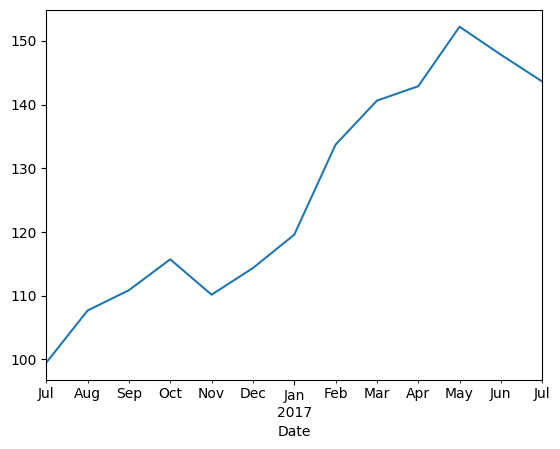

In [50]:
# prompt: It means you have calculated the mean of the close by each month ? answer with YES or NO
# YES
%matplotlib inline
df['Close'].resample('ME').mean().plot()

In [51]:
df['Close'].resample('YE').mean()

,Close
Date,
2016-12-31,110.168361
2017-12-31,139.975349


<Axes: xlabel='Date'>

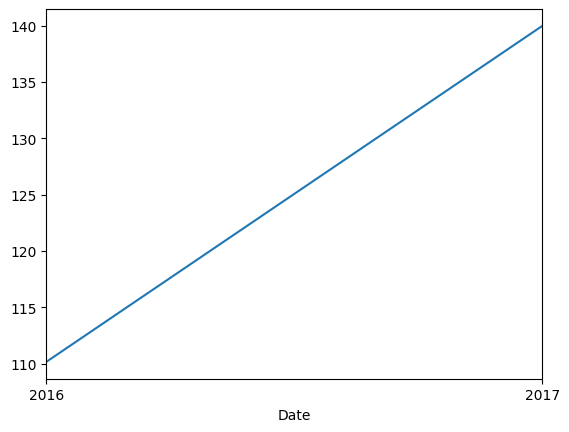

In [52]:
%matplotlib inline
df['Close'].resample('YE').mean().plot()

<ipython-input-53-c189a5e25772>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df['Close'].resample('M').mean()
<ipython-input-53-c189a5e25772>:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean = df['Close'].resample('Y').mean()


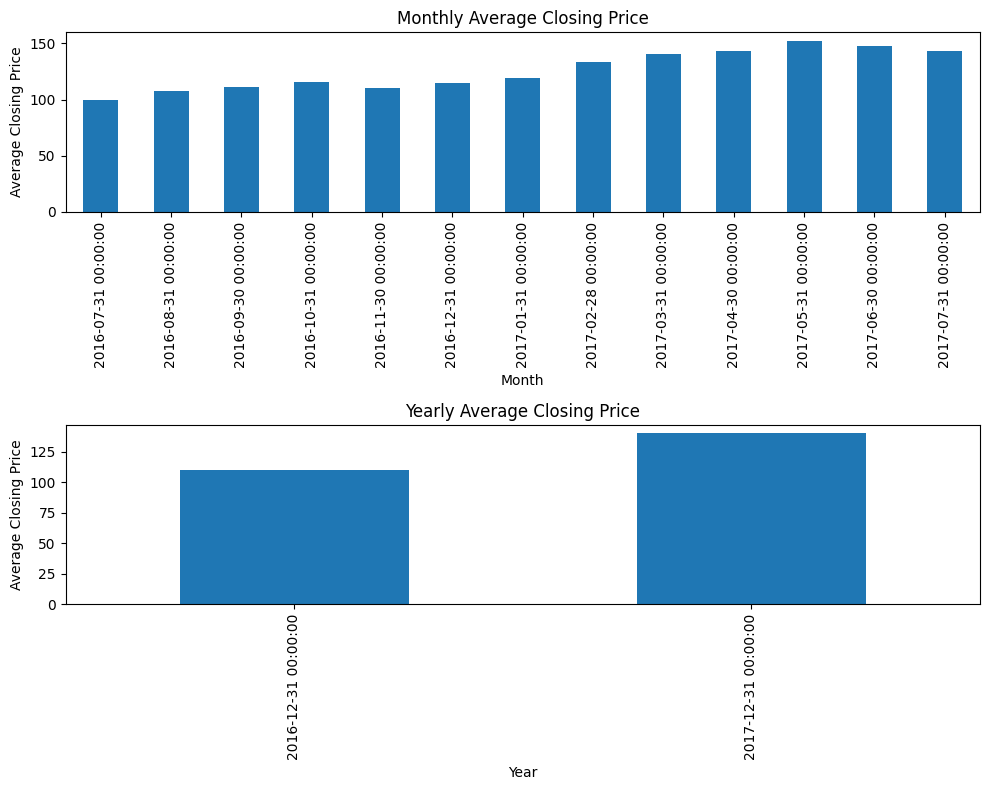

In [53]:
# prompt: plot the two sampling approaches monthly and yearly with bar plot

import matplotlib.pyplot as plt

# Monthly resampling
monthly_mean = df['Close'].resample('M').mean()

# Yearly resampling
yearly_mean = df['Close'].resample('Y').mean()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot monthly data
monthly_mean.plot(kind='bar', ax=axes[0], title='Monthly Average Closing Price')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Closing Price')


# Plot yearly data
yearly_mean.plot(kind='bar', ax=axes[1], title='Yearly Average Closing Price')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Closing Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
